# Dataset Preparation

- In this notebook we will download the following datasets.
    - Princeton Segmentation Benchmark
    - ShapeNet Parts
    - COSEG
    - Label Meshes
- Create the train/val/test splits.
- Visualize samples from the datasets.

In [1]:
import os
os.chdir('..')

In [2]:
%load_ext autoreload
%autoreload 2
from pathlib import Path
import numpy as np
import trimesh
import os
import os.path

from util.visualization_utils import * 

1. ShapeNet Parts

In [3]:
class SimCLRTrainDataTransform(object):
    """
    Transforms for SimCLR
    """

    def __init__(self, data_transforms) -> None:
        self.data_transforms = transforms.Compose(data_transforms)
        print(self.data_transforms)

    def __call__(self, sample):
        transform = self.data_transforms
        
        xi = transform(sample)
        xj = transform(sample)

        return xi, xj


## 2500 Data Points

In [4]:
from datasets.shapenet_parts.shapenet_parts import ShapeNetParts
from util.visualization_utils import visualize_pointcloud
from matplotlib import cm, colors
import numpy as np
from torchvision import transforms, datasets
from augmentations.augmentations import Rescale, Flip, GaussianWhiteNoise, CutOut, Rotation


transformations = [
#     None,
    GaussianWhiteNoise,
    Rescale,
    Flip,
    CutOut,
    Rotation
]

for transform in transformations:
    print(str(transform))
    if transform:  
        tranformation_compositions = SimCLRTrainDataTransform([transform(p=1)])
    else:
        tranformation_compositions = None
        

    # Create a dataset with train split
    train_dataset = ShapeNetParts('train', transforms=tranformation_compositions)
    val_dataset = ShapeNetParts('val',  transforms=tranformation_compositions)
    test_dataset = ShapeNetParts('test',  transforms=tranformation_compositions)


    # Test lengths
    print(f'Length of train set: {len(train_dataset)}') 

    # Get sample at index 0
    (train_sample, _), y = train_dataset[0]

    print(train_sample[0].shape)  # Expected output (1, 32, 32, 32) (the leading 1 is important for later)
    print(f"Class = {train_sample[1]}")  # Expected output: Scalar value 0
    print(train_sample[0].dtype)
    shape_points,seg = train_sample.T, y
    point_labels = (seg - min(seg)) / (max(seg) - min(seg))
    point_colors = cm.get_cmap('hsv')(point_labels)[:, :3]
    point_colors = np.sum((point_colors * 255).astype(int) * [255*255, 255, 1], axis=1)
    visualize_pointcloud(shape_points.numpy(), colors=point_colors, point_size=0.025, flip_axes=True)


ImportError: cannot import name 'CutOut' from 'augmentations.augmentations' (/home/mert/Documents/projects/ml43d/3d-object-part-segmentation-with-simclr/augmentations/augmentations.py)

## 512 Data Points

In [14]:
from datasets.shapenet_parts.shapenet_parts import ShapeNetParts
from util.visualization_utils import visualize_pointcloud
from matplotlib import cm, colors
import numpy as np
from torchvision import transforms, datasets
from augmentations.augmentations import Rescale, Flip, GaussianWhiteNoise, Rotation,RandomCuboid, RandomDrop


transformations = [
    None,
  #   GaussianWhiteNoise,
  #   Rescale,
 #     Flip,
 #     Rotation,
 RandomCuboid,
#RandomDrop,
#     CutOut
]

for transform in transformations:
    print(str(transform))
    if transform:  
        tranformation_compositions = SimCLRTrainDataTransform([transform(p=1)])
    else:
        tranformation_compositions = None
    
    # Create a dataset with train split
    train_dataset = ShapeNetParts('train', transforms=tranformation_compositions)
    train_dataset.npoints = 2500

    # Test lengths
    print(f'Length of train set: {len(train_dataset)}') 

    # Get sample at index 0
    if train_dataset.transforms:
        (train_sample1, train_sample2), (y1, y2) = train_dataset[6000]
    else:
        print('asd')
        train_sample1, y1 = train_dataset[6000]
        train_sample2 = None

    print(f'sample shape: {train_sample1[0].shape}')  # Expected output (1, 32, 32, 32) (the leading 1 is important for later)
#     print(f"Class = {train_sample[1]}")  # Expected output: Scalar value 0
    print(f'train_sample1 shape: {train_sample1.shape}')  # Expected output (1, 32, 32, 32) (the leading 1 is important for later)
    print(f'y1 shape: {y1.shape}')  # Expected output (1, 32, 32, 32) (the leading 1 is important for later)

    shape_points,seg = train_sample1.T, y1
    point_labels = (seg - min(seg)) / (max(seg) - min(seg))
    point_colors = cm.get_cmap('hsv')(point_labels)[:, :3]
    point_colors = np.sum((point_colors * 255).astype(int) * [255*255, 255, 1], axis=1)
    visualize_pointcloud(shape_points.numpy(), colors=point_colors, point_size=0.025, flip_axes=True)

    if train_sample2 is not None:
        print(f'train_sample2 shape: {train_sample2.shape}')  # Expected output (1, 32, 32, 32) (the leading 1 is important for later)
        print(f'y2 shape: {y2.shape}') 
        shape_points,seg = train_sample2.T, y2
        point_labels = (seg - min(seg)) / (max(seg) - min(seg))
        point_colors = cm.get_cmap('hsv')(point_labels)[:, :3]
        point_colors = np.sum((point_colors * 255).astype(int) * [255*255, 255, 1], axis=1)
        visualize_pointcloud(shape_points.numpy(), colors=point_colors, point_size=0.025, flip_axes=True)


None
Length of train set: 12137
asd
sample shape: torch.Size([2500])
train_sample1 shape: torch.Size([3, 2500])
y1 shape: torch.Size([2500])


Output()

<class 'augmentations.augmentations.RandomCuboid'>
Compose(
)
Length of train set: 12137
sample shape: torch.Size([2500])
train_sample1 shape: torch.Size([3, 2500])
y1 shape: torch.Size([2500])


Output()

train_sample2 shape: torch.Size([3, 2500])
y2 shape: torch.Size([2500])


Output()

In [ ]:
np.unique(seg)

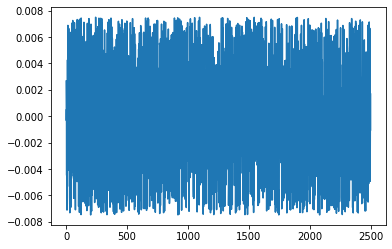

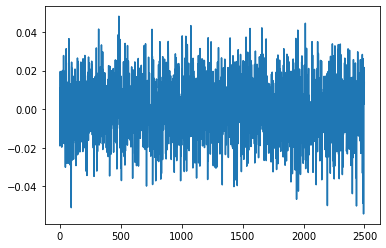

In [26]:
import matplotlib.pyplot as plt
plt.plot((np.random.rand(2500, 1) - 0.5) * 0.015)
plt.show()
plt.plot(np.random.normal(0, 0.015, (2500,1)))

In [68]:
np.unique(train_sample1).shape

(1019,)